<a href="https://colab.research.google.com/github/koto253/MATH_611/blob/main/Module01_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework  1

1. Import pandas and load the olympics.csv. 
   Show the first 10 rows. 
Here is the URL of dagta: https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv
1. Select only the NOC column using both the bracket and dot notations, show the top 5 rows. 
1. Select the rows of men's gold medals in singles badminton, and sort the results alphabetically by the player's names. 
1. List the top three countries (NOC column) that won the most medals from 1984 (inclusive) to present.
1. Plot the number of medals of the top 3 athlete in 2008 using matplotlib.pyplot.
   - use bar chart
   - use value_counts(); note the returned results is a Series. So, the x axis is the index of Series.
1. Use list comprehension to define a new column "is_US". When the country is USA, the value of is_US is True, otherwise the value is False.
1. Hide the medal information for 1988 olympics; i.e., when edition is 1988, change the Medal as "Unknown".

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv')

Problem 1.

Import pandas and load the olympics.csv. Show the first 10 rows. Here is the URL of data: https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv

In [ ]:
# PROBLEM 1

df.head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [5]:
# Problem 2

# Select only the NOC column using the bracket, show the top 5 rows. 
bracket_notation = df['NOC'].head(5)
# Select only the NOC column using the dot notations, show the top 5 rows.
dot_notation = df.NOC.head(5)

# output 
print(bracket_notation)
print('~~~~~~~~~~~~~~~')
print(dot_notation)

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object
~~~~~~~~~~~~~~~
0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object


In [31]:
# PROBLEM 3

# Select the rows of men's gold medals in singles badminton
men_gold_single_badminton = df[(df.Medal == 'Gold') & (df.Gender == 'Male') & (df.Event == 'signles badminton')]

# and, sort the results alphabetically by the player's names. 
sorted_results = men_gold_single_badminton.sort_values('Athlete')

print(sorted_results)



Empty DataFrame
Columns: [City, Edition, Sport, Discipline, Athlete, NOC, Gender, Event, Event_gender, Medal]
Index: []


In [28]:
df[(df.Event == 'badminton')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal


In [41]:
# PROBLEM 4

# List the top three countries (NOC column) that 
# won the most medals from 1984 (inclusive) to present.

filtered_by_year = df[(df.Edition >= 1984)]
# print(result)

number_of_medal = filtered_by_year.groupby('NOC').Medal.count()
# print(top_noc)

top_three_noc = number_of_medal.nlargest(3) # use `nlargest` function to retrieve top three values efficiently
print(top_three_noc)




NOC
USA    1837
AUS     762
GER     691
Name: Medal, dtype: int64


Text(0, 0.5, 'Number of medals of the top 3 athlete in 2008')

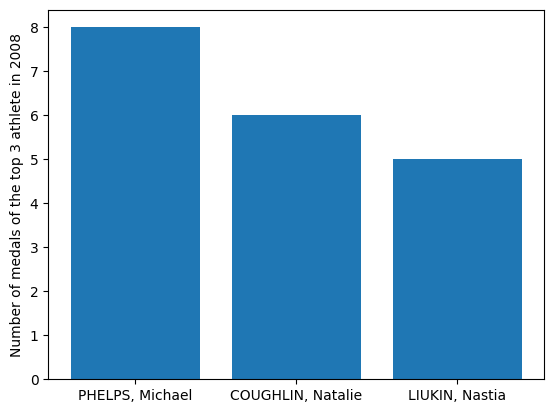

In [24]:
#PROBLEM 5

#Plot the number of medals of the top 3 athlete in 2008 using matplotlib.pyplot.
    # use bar chart
    # use value_counts(); note the returned results is a Series. So, the x axis is the index of Series.

filtered = df[(df.Edition == 2008)]
# print(filtered_by_2008)
medal_count = filtered.Athlete.value_counts()
top_athlete = medal_count.head(3)
# print(top_three_athlete)

import matplotlib.pyplot as plt
plt.bar(top_athlete.index, top_athlete.values) # define x and y
plt.ylabel('Number of medals of the top 3 athlete in 2008') # define label

In [35]:
# PROBLEM 6 

# Use list comprehension to define a new column "is_US". 
# When the country is USA, the value of is_US is True, 
# otherwise the value is False.

df['is_US'] =[True if country == 'USA' else False for country in df.NOC]
print(df['is_US'])

0        False
1        False
2        False
3        False
4        False
         ...  
29211    False
29212    False
29213    False
29214    False
29215    False
Name: is_US, Length: 29216, dtype: bool


In [32]:
# PROBLEM 7

# Hide the medal information for 1988 olympics; i.e., when edition is 1988, change the Medal as "Unknown".
hidden_medal = df.loc[df.Edition == 1988, 'Medal'] = 'Unknown' # -> The `loc` function is used to locate and modify specific rows or columns in a DataFrame based on specified conditions.
print(hidden_medal)

Unknown
